# ***Brain tumor classification using CNN***
##### ***About***
A brain tumor is a collection, or mass, of abnormal cells in your brain. The skull which encloses the brain is very rigid and hence, when the tumors grow inside the brain, they put pressure on the skull and can lead serious damages.
A brain tumor is considered one of the most aggresive diseases, among children and adults. Every year about 11,700 people are diagnosed with brain tumor. It accounts for 85-90% of all Central Nervous System tumors. The 5-year survival rate with a cancerous brain tumor is approximately 34% in men and 36% in women.
##### ***Diagnosis***
Accurate diagnosis should be done for detecting brain tumor to start proper treatment early, so as to improve the life expectancy of the patient. Best technique to diagnose for brain tumor is Magnetic Resource Imaging (MRI).
The main motive of our model is to fasten the process of identifying the patients.

#### **What a brain tumor looks like**
<img src = "https://www.cancer.gov/rare-brain-spine-tumor/sites/g/files/xnrzdm226/files/styles/cgov_article/public/cgov_image/media_image/100/200/7/files/Midline%20Glioma%20%28Article%29.jpg?h=b26af281&itok=D0zLgULJ" alt = "drawing" width = "400"/>

### *****__Types of Brain tumor__*****
#### Glioma - Occurs at the base of the brain.
#### Pituitary - tumors occur in pituitary gland (responsible for growth of the body).
#### Meningioma - tumor grows from meninges, layers of tissue covering the brain and the spinal cord.


## ***Main*** ***Code*** :
Loading the necessary classess and libraries required .

In [5]:
import cv2
import pandas
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV, KFold, train_test_split
import os
from PIL import Image
from tensorflow.keras.utils import img_to_array

ImportError: cannot import name 'img_to_array' from 'keras.preprocessing.image' (c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\preprocessing\image.py)

In [3]:
## from google.colab import drive
## drive.mount('/content/drive')
## %cd /content/drive/MyDrive/main/

Create a Category name array for the tumour types : 

In [3]:
tumor = [('glioma_tumor', 0),('meningioma_tumor', 1),('no_tumor', 2),('pituitary_tumor', 3)]

## ***Image Processing***

First of all , here we simply display a sample of each of the 4 different types of tumours 

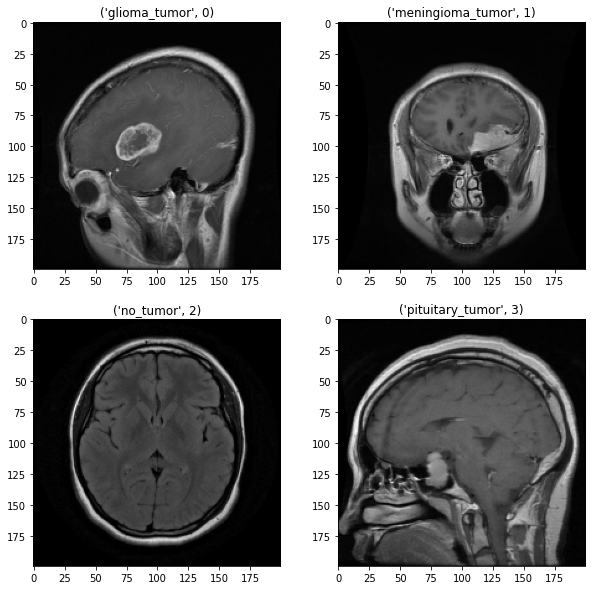

In [60]:
# Select any random 4 of the images from the dataset
Path = [
    'Training/glioma_tumor/gg (104).jpg'  ,
    'Training/meningioma_tumor/m (10).jpg',
    'Training/no_tumor/image (27).jpg'    ,
    'Training/pituitary_tumor/p (122).jpg',
]

# code block to display the images in subplot
def display (img_array) :
    
    dim = 10
    
    plt.figure(figsize  = (dim , dim))
    for i, img in enumerate(img_array) :
        plt.subplot(2, 2, i+1)
        plt.imshow(img,'gray')
        plt.title(tumor[i])
        
    plt.show()


image_array = []
for i, image_path in enumerate(Path) :
    image_array.append(cv2.resize(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), (200,200)))



# finally display 
display(image_array)

Adding the Training and Testing set to variables as arrays 

In [5]:
def get_array (path) :
    
    X = []
    y = []
    
    for typ, val in tumor :
        for image in os.listdir(path+typ) :
            img = cv2.resize(cv2.imread(path+typ+'/'+image, cv2.IMREAD_GRAYSCALE), (200,200))
            
            # create arrays
            X.append(img_to_array( Image.fromarray(img)))
            y.append(val)
    return X, y

Load the respective paths to the function to get array  

In [6]:
path1 = 'Training/'
path2 = 'Testing/'

X_train, y_train = get_array(path1)
X_test , y_test  = get_array(path2)

## ***Convert the arrays into Numpy Arrays***  
 NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized ###even further.

In [7]:
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

### ***Scale the arrays***

In [8]:
# Normalization to value range between 0 and 1 after dividing by 255

X_train = np.array(X_train)
X_train/= 255.0
y_train = np.array(keras.utils.to_categorical(y_train))

In [9]:
X_test = np.array(X_test)
X_test/= 255.0
y_test = np.array(keras.utils.to_categorical(y_test))

***Finding the dimensions of training data***

In [11]:
print(X_train.shape)
print(y_train.shape)

(2870, 200, 200, 1)
(2870, 4)


***Finding the dimensions of testing data***

In [12]:
print(X_test.shape)
print(y_test.shape)

(394, 200, 200, 1)
(394, 4)


In [20]:
info = {0 : 'Glioma tumor', 1 : 'Meningioma tumor', 2 : 'No tumor', 3 : 'Pituitary tumor'}

## ***Class frequency distribution***

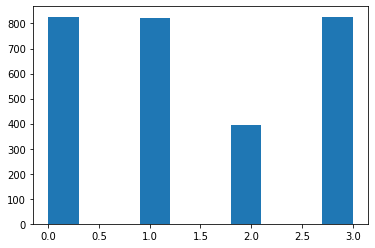

In [14]:
plt.hist(np.argmax(y_train, axis = 1))
plt.show()

***Synthetic Minority Oversampling***  <br> <br>
**Glioma tumor, Meningioma tumor** and **Pituitary tumor** almost same number of datasets ie. 826, 822 and 827 respectively. But the label **no_tumor** has only 395 samples. Since the number of samples for **no_tumor** class is less, let's oversample that class using SMOTE from imblearn package.

In [15]:
print(X_train.shape)
print(y_train.shape)

(2870, 200, 200, 1)
(2870, 4)


In [16]:
X_train = np.reshape(X_train, (2870, 200*200*1))
print(X_train.shape)
print(y_train.shape)

(2870, 40000)
(2870, 4)


**SMOTE ( Synthetic Minority Oversampling Technique )** is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

In [17]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(sampling_strategy = 'auto', random_state = 1, k_neighbors = 5).fit_resample(X_train, y_train)

In [18]:
print(X_train.shape)
print(y_train.shape)

(3308, 40000)
(3308, 4)


In [19]:
X_train = np.reshape(X_train, (3308, 200, 200, 1))
print(X_train.shape)
print(y_train.shape)

(3308, 200, 200, 1)
(3308, 4)


New Samples Count of the dataset is now equally distributed

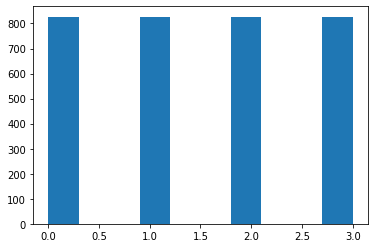

In [20]:
plt.hist(np.argmax(y_train, axis = 1))
plt.show()

## ***Images of test samples***
 A few random images from the training datataset we will use 

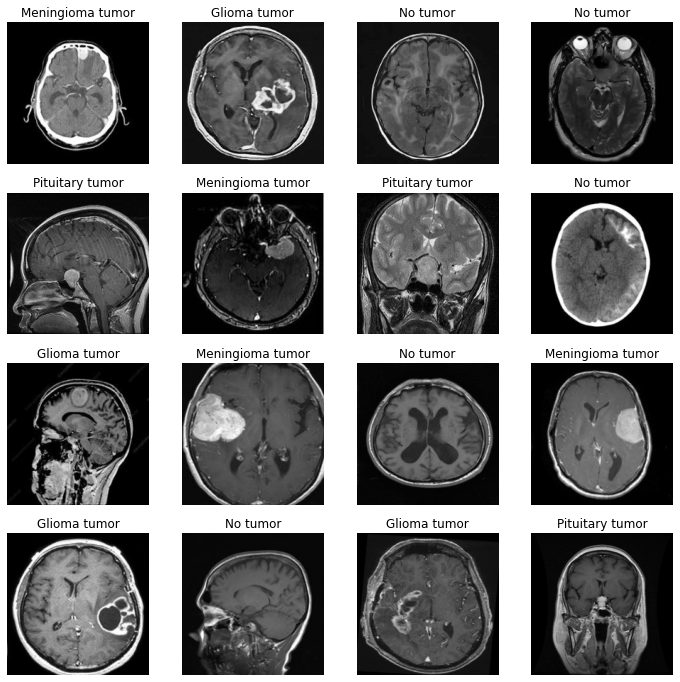

In [21]:
plt.figure(figsize = (12,12))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    x = np.random.randint(0,390)
    plt.imshow(X_test[x][:,:,0],'gray')
    plt.title(info[np.argmax(y_test[x])])
    plt.axis('off')
plt.show()

### ***Model creation and training***

In [22]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Conv2D

In [23]:
def conv_layer (filterx) :
    
    model = Sequential()
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'valid'))
    model.add(BatchNormalization())
    
    return model

In [24]:
def dens_layer (hiddenx) :
    
    model = Sequential()
    model.add(Dense(hiddenx, activation = 'relu', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

In [25]:
def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    
    model.add(Input((200,200,1,)))
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    model.add(Dense(4, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])
    
    return model

## ***Use ImageDataGenerator for image data augmentation***

In [26]:
print(X_train.shape)
print(y_train.shape)

(3308, 200, 200, 1)
(3308, 4)


In [27]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(zoom_range = [0.85, 1.0], rotation_range = 3)

In [28]:
gen.fit(X_train)
train_gen = gen.flow(X_train, y_train, batch_size = 32)

In [29]:
trainX, trainy = train_gen.next()

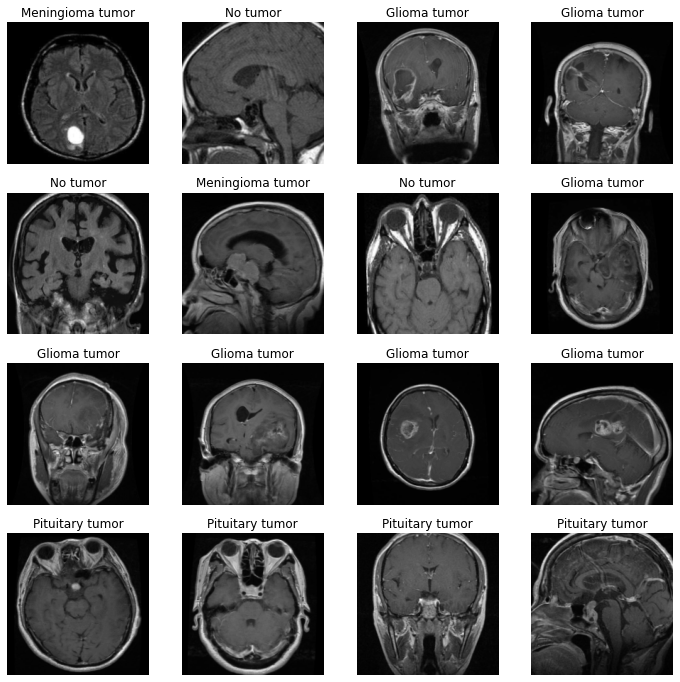

In [30]:
plt.figure(figsize = (12,12))
for i in range(16) :
    plt.subplot(4, 4, i+1)
    plt.imshow(trainX[i][:,:,0], 'gray')
    plt.title(info[np.argmax(trainy[i])])
    plt.axis('off')
plt.show()

## ***Model implementation***

In [31]:
from keras.callbacks import ModelCheckpoint
checkp = ModelCheckpoint('./brain_model.h5', monitor = 'val_accuracy', save_best_only = True, verbose = 1)

In [32]:
model = cnn(128, 64, 32, 128, 64)

In [33]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 100, 100, 128)     1792      
                                                                 
 sequential_2 (Sequential)   (None, 50, 50, 64)        74048     
                                                                 
 sequential_3 (Sequential)   (None, 25, 25, 32)        18592     
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 sequential_4 (Sequential)   (None, 128)               2560640   
                                                                 
 sequential_5 (Sequential)   (None, 64)                8512      
                                                                 
 dense_2 (Dense)             (None, 4)                 2

In [34]:
history = model.fit(gen.flow(X_train, y_train, batch_size = 32), epochs = 1000, validation_data = (X_test,y_test), callbacks = [checkp])

Epoch 1/1000
 83/104 [======================>.......] - ETA: 1:05 - loss: 4.3419 - accuracy: 0.6495

KeyboardInterrupt: 

In [35]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

 ### ***Prediction*** <br>
 We here now load the model that we trained for predicition pusrposes.
 The testing set is loaded and predicted and values are matched with the y_test values to verify 

In [1]:
from keras.models import load_model
model = load_model('./brain_model.h5')


# the testing set is now loaded into the model 

pred = model.predict(X_test)


KeyboardInterrupt: 

In [11]:
print(pred[0:3,:])

[[1.1989752e-01 1.1685515e-04 5.5472517e-01 3.2526043e-01]
 [9.0861686e-02 9.0755379e-01 1.5716401e-03 1.2869222e-05]
 [1.3607771e-05 6.1157902e-05 9.9980611e-01 1.1915266e-04]]


Here the output array shows us values from prediction and we get the values corresponding to each of the category .            
In the below function ,  np.argmax()  returns the index of the maximum value in the array of 4 values                       
The function np.zeroes returns a new array with the length equal to pred array and values as zero.




In [12]:
temp = np.argmax(pred, axis = 1)
pred = np.zeros(pred.shape)

Here below the pred array is now simply an array of zeroes , now we change the indices at the position that we stored in temp 
that showed us what category the image belonged to

In [13]:
print(pred)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


The below function np.arange(int) returns an array from values 0 to int in order .
hence the corresponing values of pred according to the temp index array will turn to value 1 .

In [14]:
pred[np.arange(pred.shape[0]), temp] = 1

In [15]:
print(pred)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


Now we match the above predicted **"pred"** values array to the below **"y_test"** results to verify and analyse the performance of our model 

In [16]:
print(y_test)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [17]:
from sklearn.metrics import accuracy_score , classification_report
print('Accuracy : ' + str(accuracy_score(y_test, pred)))
print(classification_report(y_test, pred, target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']))

Accuracy : 0.8045685279187818
                  precision    recall  f1-score   support

    glioma_tumor       0.86      0.30      0.44       100
meningioma_tumor       0.79      0.96      0.86       115
        no_tumor       0.74      0.98      0.84       105
 pituitary_tumor       0.94      1.00      0.97        74

       micro avg       0.80      0.80      0.80       394
       macro avg       0.83      0.81      0.78       394
    weighted avg       0.82      0.80      0.77       394
     samples avg       0.80      0.80      0.80       394



***Final Stage*** <br>
Using our Model to predict and classify Tumour on required MRI images

In [2]:
#Load the model
from keras.models import load_model
model = load_model('./brain_model.h5')

#Load Select function
from tkinter import *
from PIL import ImageTk, Image
from tkinter import ttk, filedialog
from tkinter.filedialog import askopenfile
import os

# Create an instance of tkinter frame
win = Tk()
# Set the geometry of tkinter frame 
win.geometry("1300x800")

def open_file():
   file = filedialog.askopenfile(mode='r', filetypes=[('ALL Files', '*.*')])
   if file:
      filepath = os.path.abspath(file.name)
      file_name = filepath
      myinp = cv2.resize(cv2.imread(file_name, cv2.IMREAD_GRAYSCALE), (200,200))
      myinp = np.array(myinp)/255.0
      pred = model.predict(np.array( [myinp] ))
      index_of_val = np.argmax(pred) ;

      Label(win, text=" The selected MRI image matches most to  : " + info[index_of_val], font=('Aerial 11')).place()

      img_g = Image.open(Path[0])
      img_g = img_g.resize((130,130),Image.Resampling.LANCZOS)
      img_g = ImageTk.PhotoImage(img_g)
      imgg = Label(win, image=img_g)
      imgg.image = img_g

      img_m = Image.open(Path[1])
      img_m = img_m.resize((130,130),Image.Resampling.LANCZOS)
      img_m = ImageTk.PhotoImage(img_m)
      imgm = Label(win, image=img_m)
      imgm.image = img_m

      img_n = Image.open(Path[2])
      img_n = img_n.resize((130,130),Image.Resampling.LANCZOS)
      img_n = ImageTk.PhotoImage(img_n)
      imgn = Label(win, image=img_n)
      imgn.image = img_n

      img_p = Image.open(Path[3])
      img_p = img_p.resize((130,130),Image.Resampling.LANCZOS)
      img_p = ImageTk.PhotoImage(img_p)
      imgp = Label(win, image=img_p)
      imgp.image = img_p

      Label(win , text="||-----------------------------------------------------------||").place(x=20, y=75)
      Label(win , text="||-----------------------------------------------------------||").place(x=20, y=110)
      Label(win , text="    MRI SAMPLES for each TUMOUR   " ,fg = 'white', bg='blue' , font = ('Ariel' ,13)).place(x=30, y=90)


      Label(win , text="||-----------------------------------------||").place(x=330, y=75)
      Label(win , text="||-----------------------------------------||").place(x=330, y=110)
      Label(win , text="       Predicted Output      " , fg = 'white', bg='blue', font = ('Ariel' ,13)).place(x=345, y=90)

      Label(win , text="||---------------------------------------------||").place(x=550, y=75)
      Label(win , text="||---------------------------------------------||").place(x=550, y=110)
      Label(win , text="              Analysis                " ,fg = 'white', bg='blue' , font = ('Ariel' ,13)).place(x=565, y=90)



      imgg.place(x=200, y=120)
      Label(win , text=" Gioma Tumour Sample ").place(x=20, y=180)
      Label(win , text= 77*"--").place(x=20, y=260)
      Label(win , text=pred[0][0] , font = (10) ).place(x=380, y=180)


      imgm.place(x=200, y=280)
      Label(win , text=" Meningioma Tumour Sample ").place(x=20, y=340)
      Label(win , text= 77*"--").place(x=20, y=420)
      Label(win , text=pred[0][1] , font = (10) ).place(x=380, y=340)


      imgn.place(x=200, y=440)
      Label(win , text=" No Tumour Sample ").place(x=20, y=500)
      Label(win , text= 77*"--").place(x=20, y=580)
      Label(win , text=pred[0][2] , font = (10) ).place(x=380, y=500)

      imgp.place(x=200, y=600)
      Label(win , text=" Pituitary Tumour Sample ").place(x=20, y=660)
      Label(win , text=pred[0][3] , font = (10) ).place(x=380, y=660)


      Label(win , text="spa." , fg='white' , bg='white',font = ("Arial",80) ).place(x=565, y=135)
      Label(win , text="spa." , fg='white' , bg='white',font = ("Arial",82) ).place(x=565, y=285)
      Label(win , text="spa." , fg='white' , bg='white',font = ("Arial",80) ).place(x=565, y=450)
      Label(win , text="spa." , fg='white' , bg='white',font = ("Arial",80) ).place(x=565, y=600)

      



      inputimage = Image.open(file_name)
      inputimage = inputimage.resize((300,300),Image.Resampling.LANCZOS)
      inputimage = ImageTk.PhotoImage(inputimage)
      inputimagedisp = Label(win, image=inputimage)
      inputimagedisp.image=inputimage
      inputimagedisp.place(x=915,y=200)
      Label(win , text=" __________________ ",font=("Arial", 23)).place(x=900, y=140)
      Label(win , text=" Final Predicted Output",font=("Arial", 23)).place(x=900, y=130)
      Label(win , text=" The Input MRI image is of a : ",font=(15)).place(x=930, y=530)
      Label(win , text= "--------------",fg='gray',bg='gray',font=('Ariel',50)).place(x=913, y=555)
      Label(win , text= info[index_of_val],bg='red',font=('Ariel',20)).place(x=970, y=570)

      Label(win , text=" Maximum output ", fg='white',bg='black',font=("Arial", 15)).place(x=593, y= 173 + index_of_val*156)
      Label(win , text=" value obtained ", fg='white',bg='black',font=("Arial", 15)).place(x=603, y= 198 + index_of_val*156)




# Add a Label widget
label = Label(win, text="Select the Required MRI image", font=('Georgia 10'))
label.pack(pady=5)

# Create a Button
ttk.Button(win, text="Browse Image", command=open_file).pack(pady=20)

win.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\nikhi\AppData\Local\Temp\ipykernel_8516\3819572677.py", line 22, in open_file
    myinp = cv2.resize(cv2.imread(file_name, cv2.IMREAD_GRAYSCALE), (200,200))
NameError: name 'cv2' is not defined
